# Part1. 고구마 소매가격 상관관계 분석

In [1]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ('AppleGothic', 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 5. 서울시 농수산물 경매 가격 분석
- 전체 경매 데이터 중 '고구마' 품목으로 범위를 좁혀 분석 진행
- 원천 데이터: 고구마 경매정보: [서울 열린데이터 광장- 서울시 농수산물 경매정보](http://data.seoul.go.kr/dataList/OA-2662/S/1/datasetView.do)
- 피처(X) : 연도, 경매월, 품종, 등급, 가격, 산지, 친환경구분
- 타겟(Y) : 경매 가격

## 5.1 데이터 전처리
- 입력일(YYYYMMDD) -> 연도(YYYY)와 경매월(MM)로 분리하여 새로운 컬럼 생성
- 품종명에서 [고구마]카레고리 명 삭제
- 등급 데이터에서 숫자만 남기고 1~9로 변경
- 가격/단위 로 1kg당 가격으로 변경하여 '가격(kg)'으로 새로운 컬럼 생성

In [2]:
# 전처리 완료한 전체 데이터셋 불러오기
auction = pd.read_csv('data/auction/auction_v1.csv', encoding='euc-kr')
auction.head()

,연도,경매월,품종,등급,가격(kg),산지,친환경구분,단위,가격
0,2017,11,호박밤고구마,1,500.0,경기,일반,10.0,5000
1,2017,11,호박고구마,1,1200.0,충남,일반,10.0,12000
2,2017,11,호박고구마,1,1300.0,경기,일반,10.0,13000
3,2017,11,호박고구마,1,1950.0,경기,일반,10.0,19500
4,2017,11,호박고구마,1,1900.0,경기,일반,10.0,19000


##### 5.1.1 피처 데이터 탐색

In [3]:
# 데이터 크기 및 타입 확인
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337008 entries, 0 to 337007
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연도      337008 non-null  int64  
 1   경매월     337008 non-null  int64  
 2   품종      337008 non-null  object 
 3   등급      337008 non-null  int64  
 4   가격(kg)  337008 non-null  float64
 5   산지      337008 non-null  object 
 6   친환경구분   337008 non-null  object 
 7   단위      337008 non-null  float64
 8   가격      337008 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 23.1+ MB


In [4]:
# 데이터 크기 확인
auction.shape

(337008, 9)

In [5]:
# 결측치 확인
auction.isnull().sum().sum()

0

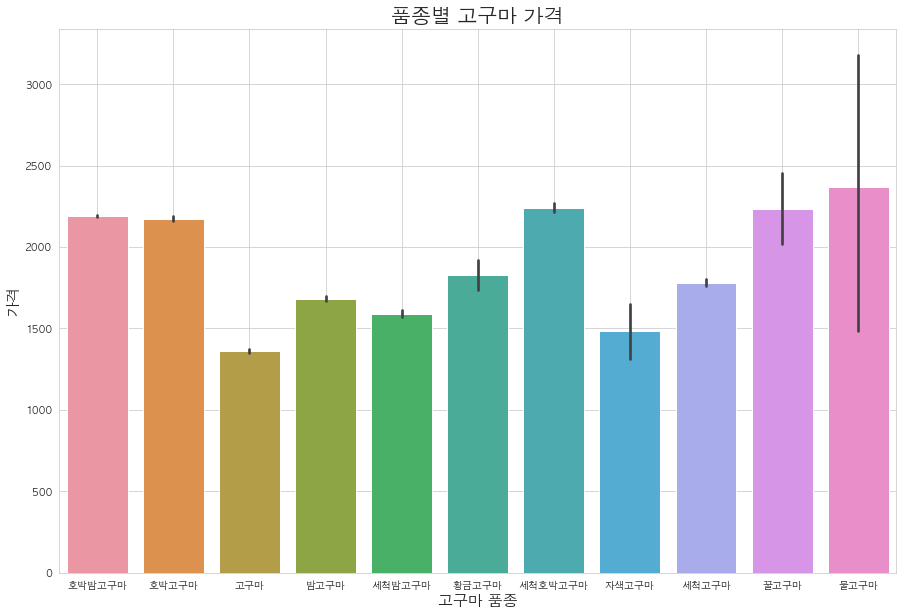

In [6]:
# 품종별 평균 가격 시각화
plt.figure(figsize=(15, 10))
sns.barplot(auction['품종'], auction['가격(kg)'])
plt.title('품종별 고구마 가격', fontsize=20)
plt.xlabel('고구마 품종', fontsize=15)
plt.ylabel('가격', fontsize=15)
plt.grid(True)
plt.show()

- 세척 고구마 3종류가 '세척'이라는 추가 과정이 더해져서 평균 가격이 높을 것이라고 예상했으나, 일반 고구마들과 큰 가격 차이는 없었음

호박밤고구마     186851
호박고구마       91528
고구마         18081
밤고구마        16238
세척고구마        8850
세척호박고구마      8110
세척밤고구마       6941
황금고구마         246
꿀고구마           81
자색고구마          73
물고구마            9
Name: 품종, dtype: int64


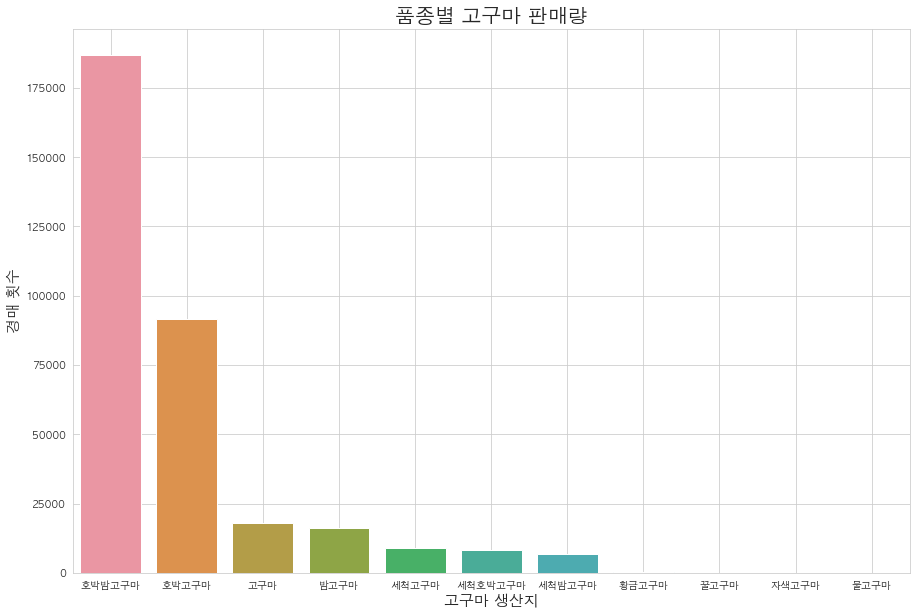

In [7]:
# 범주형: 품종별 데이터 분포 확인
print(auction['품종'].value_counts())
data = auction['품종']
plt.figure(figsize=(15, 10))
sns.countplot(x=data, order=data.value_counts().index)
plt.title('품종별 고구마 판매량', fontsize=20)
plt.xlabel('고구마 생산지', fontsize=15)
plt.ylabel('경매 횟수', fontsize=15)
plt.grid(True)
plt.show()

- 호박밤고구마가 다른 품종의 경매횟수를 모두 합친 값보다 많을 정도로 경매 횟수가 높음
- 가장 대중적인 호박밤고구마, 호박고구마 밤고구마와 세척 고구마 3종류, 기타 고구마 5종류로 크게 분류하기로 함

충남        130480
경기         83926
전북         65451
전남         35179
충북         12040
강원          3709
인천          3554
경북          1006
서울           844
경남           564
광주           101
대전            94
수입(중국)        18
해당            12
대구            12
제주            11
청주             7
Name: 산지, dtype: int64


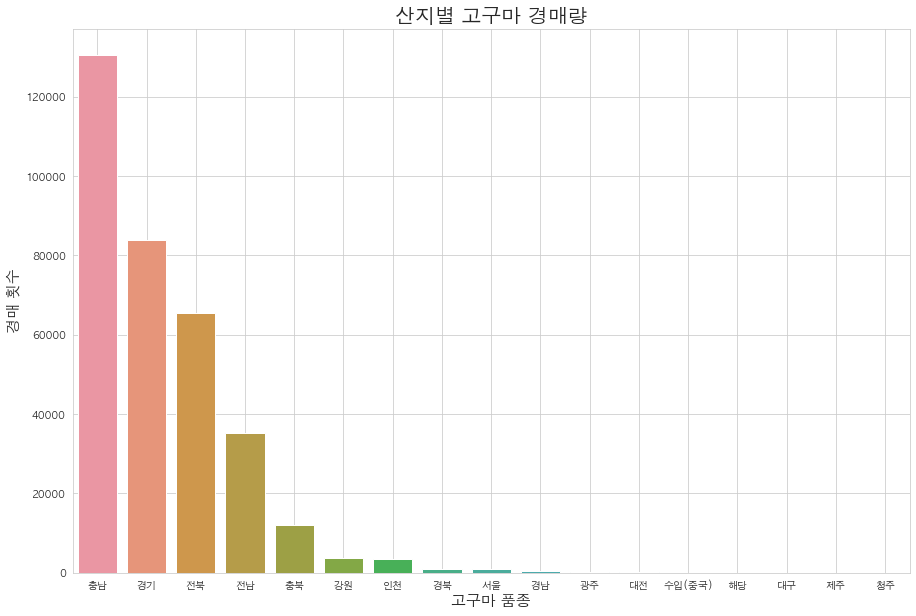

In [8]:
# 범주형: 산지별 데이터 분포 확인
print(auction['산지'].value_counts())
data = auction['산지']
plt.figure(figsize=(15, 10))
sns.countplot(x=data, order=data.value_counts().index)
plt.title('산지별 고구마 경매량', fontsize=20)
plt.xlabel('고구마 품종', fontsize=15)
plt.ylabel('경매 횟수', fontsize=15)
plt.grid(True)
plt.show()

- 경매 빈도가 높은 지역과 최다 생산지의 순위가 다름
    - 경매 빈도가 높은 산지 = 충남>경기>전북>전남
    - 생산량이 많은 지역 = 전남>전북>경기>충남
    - 원인 분석1
        - 생산량이 많은 전남과 전북 산지의 고구마는 서울 외의 타 지역의 경매장으로 출품되는 비율이 높음
        - 충남 산지의 고구마는 타 지역의 경매장에 출품되는 비율이 적음
        - 따라서 충남 산지의 고구마는 서울이 주 타겟, 전라도 산지의 고구마는 전국을 타겟으로 하고 있어 생산량과 경매빈도의 순위가 다른 양상을 보이는 것으로 추정됨
        - 출처: [농업 ON - 실시간 경매정보]([https://www.agrion.kr/](https://www.agrion.kr/))
    - 원인 분석2
        - 충남(당진), 경기(여주) 지역은 대규모 재배 농가 비율이 높아 도매시장 출하 비율이 높으며, 전남(해남) 지역은 생산자 단체(지역농협, 영농조합법인 등)를 통한 출하 비율이 높음
        - 출처: [KAMIS 2020년 품목별 유통실태](https://www.kamis.or.kr/customer/archive/archive.do?action=detail&archiveNo=23)

일반       284859
무농약       40319
우수농산물      6374
유기농        5402
전환기          39
품질인증         15
Name: 친환경구분, dtype: int64


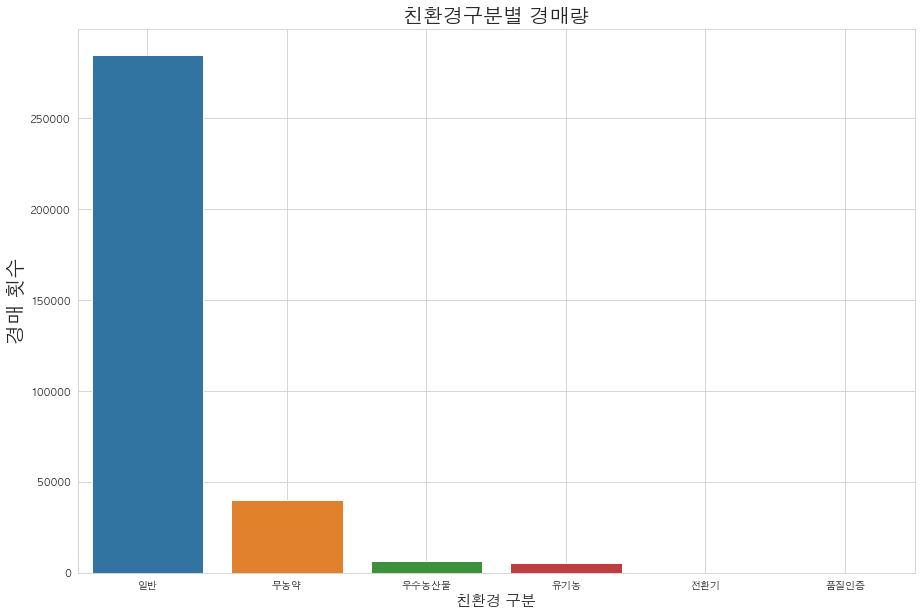

In [9]:
# 범주형: 친환경구분별 데이터 분포 확인
print(auction['친환경구분'].value_counts())
data = auction['친환경구분']
plt.figure(figsize=(15, 10))
sns.countplot(x=data, order=data.value_counts().index)
plt.title('친환경구분별 경매량', fontsize=20)
plt.xlabel('친환경 구분', fontsize=15)
plt.ylabel('경매 횟수', fontsize=20)
plt.grid(True)
plt.show()

- 대부분의 고구마는 일반 고구마이며, 무농약, 유기농 등의 다른 친환경 구분의 비중은 매우 미약함
- 고구마는 '친환경' 구분에 따른 공급의 차이는 크지 않음

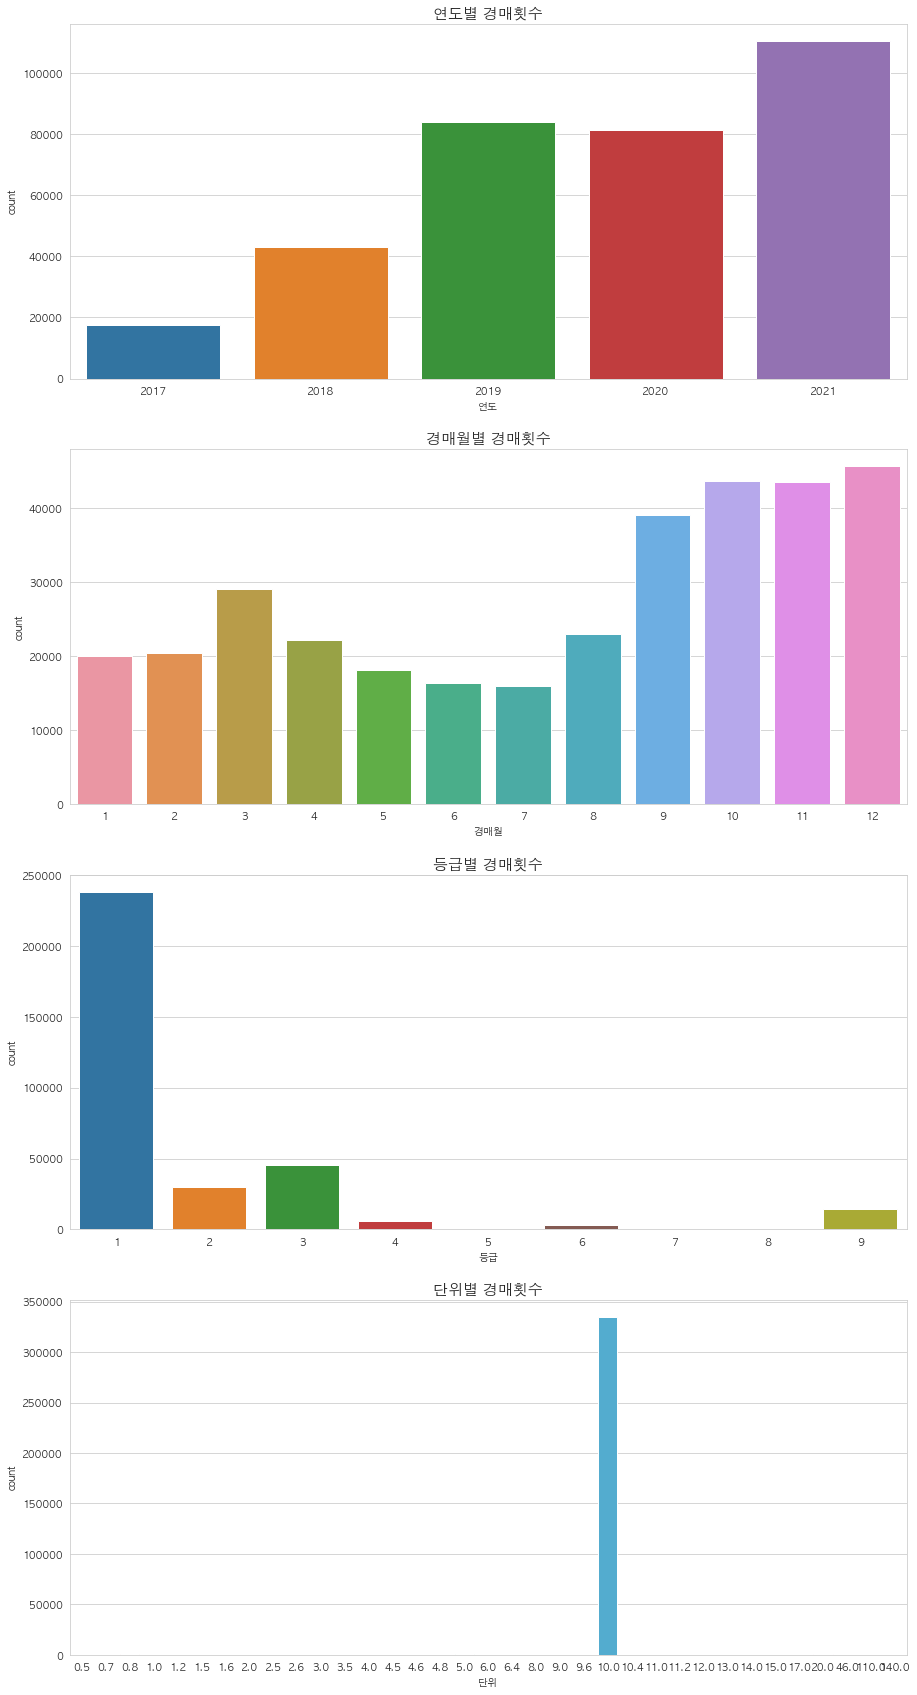

In [10]:
# 수치형 데이터 분포 확인
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(15, 30), nrows=4, ncols=1)

ax1.set_title('연도별 경매횟수', fontsize=15)
sns.countplot(auction['연도'], ax=ax1)

ax2.set_title('경매월별 경매횟수', fontsize=15)
sns.countplot(auction['경매월'], ax=ax2)

ax3.set_title('등급별 경매횟수', fontsize=15)
sns.countplot(auction['등급'], ax=ax3)

ax4.set_title('단위별 경매횟수', fontsize=15)
sns.countplot(auction['단위'], ax=ax4)

plt.show()

- 연도별 그래프:
    - 최근 년도로 갈수록 고구마의 가격이 증가하는 추세임
- 경매월별:
    - 9월 ~ 12월까지 고구마 판매 횟수가 3만회 이상으로 높게 나타나며, 1~8월 중 3월을 제외하고 2만회 내외의 경매 횟수로 나타남
    - 고구마의 수확시기인 8월 초순부터 고구마 공급이 늘어나면서 경매 빈도가 증가하며, 1월부터 7월까지 출하량이 적은 편임
    - 3월에 경매 횟수가 높은 원인에 대해 조사하였으나, 특별한 근거를 발견하지 못함. 입력일이 실제 경매가 일어난 달에 작성된 것이 아닐 가능성도 있음
- 등급별:
    - 1등급(특(1등))의 고구마가 압도적으로 많이 거래되었음
    - 1등급(특(1등))>>3등급(보통(3등))>2등급(상(2등)>9등급(9등(등외)) 순으로 거래 빈도가 높음
- 단위별:
    - 고구마 경매는 10kg 단위로 거래되는 것이 일반적

##### 5.1.2 타겟(가격) 데이터 탐색
- 이상치 탐색


<Figure size 1080x1080 with 0 Axes>

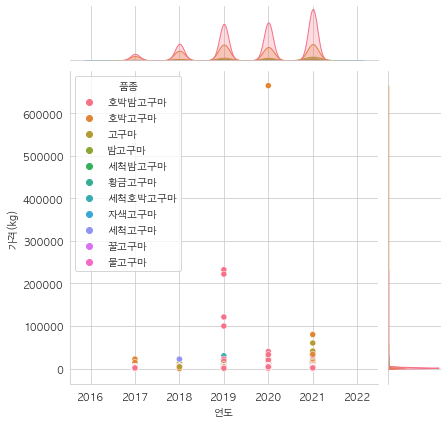

In [11]:
# 품종별 가격 평균
plt.figure(figsize=(15,15))
sns.jointplot(x=auction['연도'], y=auction['가격(kg)'], hue=auction['품종'])
plt.show()

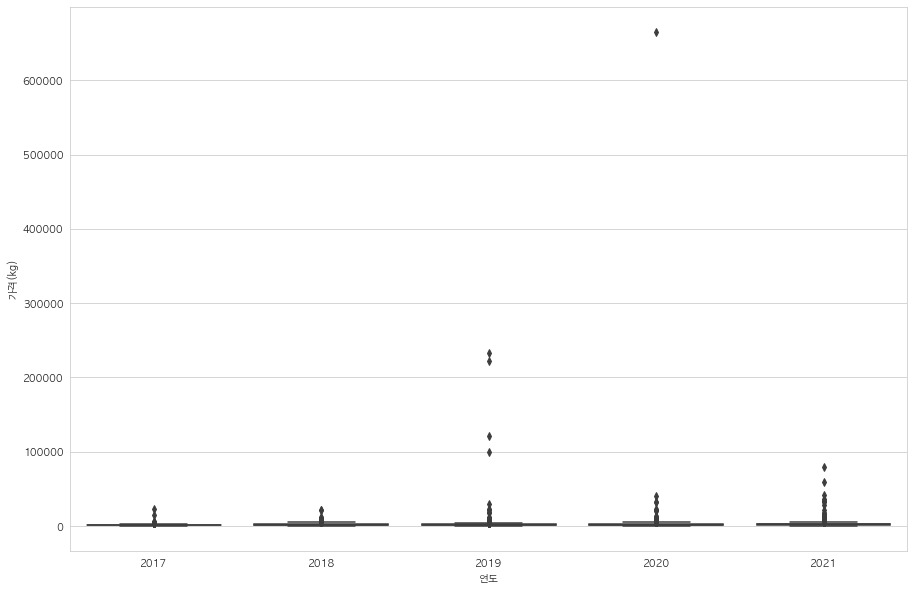

In [12]:
# 품종별 가격 평균
plt.figure(figsize=(15,10))
sns.boxplot(x=auction['연도'], y=auction['가격(kg)'])
plt.show()

In [13]:
# 고구마 1kg당 가격이 비정상적으로 높은 데이터 확인
auction.sort_values(by='가격(kg)', ascending=False)

,연도,경매월,품종,등급,가격(kg),산지,친환경구분,단위,가격
177470,2020,6,호박고구마,1,665000.0,충남,일반,10.0,6650000
70957,2019,4,호박밤고구마,1,232300.0,전남,무농약,10.0,2323000
117869,2019,10,호박밤고구마,3,222100.0,경기,일반,10.0,2221000
137368,2019,8,호박밤고구마,1,121200.0,경기,일반,10.0,1212000
96492,2019,12,호박밤고구마,1,99990.0,전북,일반,10.0,999900
...,...,...,...,...,...,...,...,...,...
329894,2021,12,호박밤고구마,1,50.0,전남,일반,10.0,500
68194,2019,5,호박고구마,1,50.0,경기,일반,10.0,500
15449,2017,12,세척호박고구마,9,50.0,전남,일반,10.0,500
319061,2021,11,호박고구마,9,50.0,충남,일반,10.0,500


##### 5.1.3 이상치 처리
- 연도별 품종별 가격 그래프 분석:
    - 2020년 극단치 가격 데이터 확인 필요
    - 2019년 이상치 데이터 확인 필요
    - 박스 플롯 등으로 이상치 추가 탐색 후 이상치 기준 확립
        - 10만원 -> 6만원 -> 1만원 -> 6천원
    - 고구마 1kg당 가격이 6000원 이상인 데이터는 이상치로 분류 -> 삭제
    - '단위', '가격' 컬럼 삭제(가격(kg)과 중복)

In [14]:
# 고구마 1kg당 가격이 6,000원 이상인 이상치 데이터 삭제
del_index = auction[auction['가격(kg)']>=6000].index
auction.drop(del_index, inplace=True)
auction.drop('가격', axis=1, inplace=True)

# 이상치 가격 삭제 후 내림차순 정렬하여 확인
auction.sort_values(by='가격(kg)', ascending=False).head(20)

,연도,경매월,품종,등급,가격(kg),산지,친환경구분,단위
264955,2021,4,호박고구마,1,5950.0,충남,무농약,10.0
234876,2021,1,호박밤고구마,3,5950.0,충남,무농약,10.0
260169,2021,3,호박밤고구마,1,5950.0,충남,무농약,10.0
219689,2020,12,호박밤고구마,1,5950.0,충남,무농약,10.0
174574,2020,5,호박밤고구마,3,5950.0,충남,무농약,10.0
261791,2021,4,호박밤고구마,1,5950.0,충남,무농약,10.0
179866,2020,6,호박밤고구마,1,5950.0,전남,유기농,10.0
217328,2020,12,호박밤고구마,1,5950.0,충남,무농약,10.0
171629,2020,5,호박밤고구마,1,5950.0,충남,무농약,10.0
171292,2020,5,호박밤고구마,1,5950.0,충남,무농약,10.0


In [15]:
# 이상치 제거 후 데이터 개수 확인
auction.shape

(334893, 8)

In [16]:
# 고구마 1kg당 가격의 기술통계량 확인
auction['가격(kg)'].describe()

count    334893.000000
mean       2059.073303
std        1131.240347
min          11.900000
25%        1200.000000
50%        1900.000000
75%        2750.000000
max        5950.000000
Name: 가격(kg), dtype: float64

## 5.2 품종과 가격의 상관관계
##### 5.2.1 고구마 품종 하위분류 수정
- 호박밤, 호박, 밤, 세척고구마, 기타고구마로 품종 분류 변경
- 고구마, 황금고구마, 물고구마, 자색고구마, 꿀고구마 -> 기타고구마
- 세척고구마, 세척호박고구마, 세척밤고구마 -> 세척고구마

In [17]:
## 호박밤, 호박, 밤, 세척고구마, 기타고구마로 품종 분류 변경
# 고구마, 황금고구마, 물고구마, 자색고구마, 꿀고구마 -> 기타고구마

auction2 = auction
etc_list = ['고구마', '황금고구마', '물고구마', '자색고구마', '꿀고구마']

for i in etc_list:
    auction2.loc[auction2['품종']==i, '품종']='기타고구마'

auction2['품종'].value_counts()

호박밤고구마     186141
호박고구마       90234
기타고구마       18477
밤고구마        16216
세척고구마        8845
세척호박고구마      8040
세척밤고구마       6940
Name: 품종, dtype: int64

In [18]:
## 호박밤, 호박, 밤, 세척고구마, 기타고구마로 품종 분류 변경
# 세척고구마, 세척호박고구마, 세척밤고구마 -> 세척고구마
cleaned_list = ['세척고구마', '세척호박고구마', '세척밤고구마']
for i in cleaned_list:
    auction2.loc[auction2['품종']==i, '품종'] = '세척고구마'

auction2['품종'].value_counts()

호박밤고구마    186141
호박고구마      90234
세척고구마      23825
기타고구마      18477
밤고구마       16216
Name: 품종, dtype: int64

In [19]:
# 데이터 타입 변경
auction2 = auction2.astype({'연도': 'int',
                            '경매월': 'int',
                            '등급':'float',
                            '가격(kg)': 'int',
                            '단위': 'int'})
auction2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334893 entries, 0 to 337007
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연도      334893 non-null  int64  
 1   경매월     334893 non-null  int64  
 2   품종      334893 non-null  object 
 3   등급      334893 non-null  float64
 4   가격(kg)  334893 non-null  int64  
 5   산지      334893 non-null  object 
 6   친환경구분   334893 non-null  object 
 7   단위      334893 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 23.0+ MB


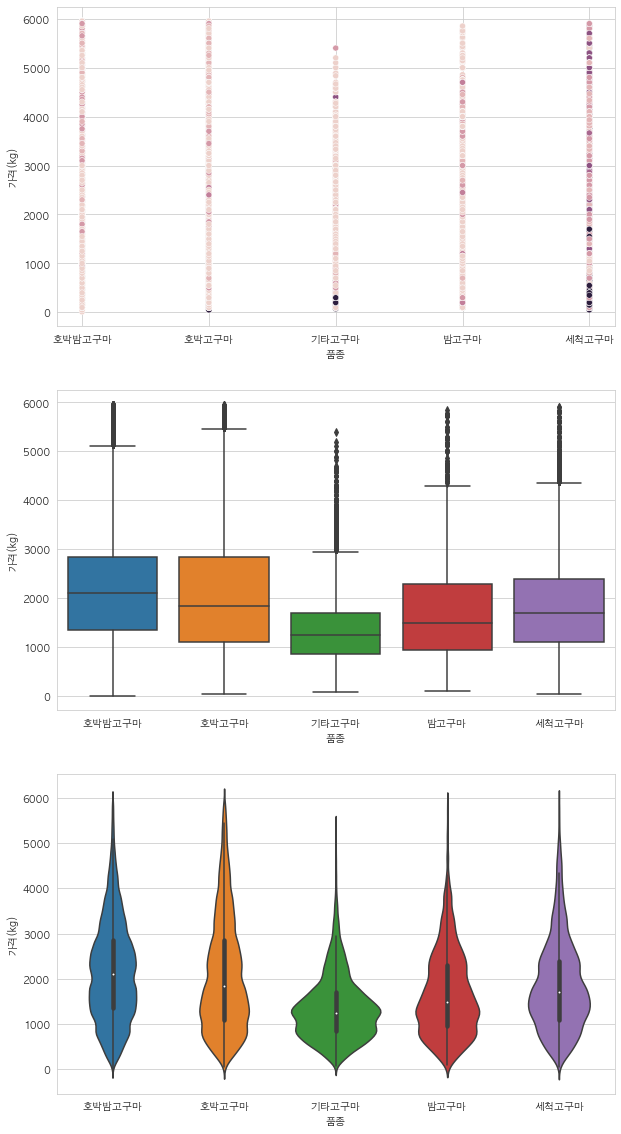

In [20]:
# 품종 분류 수정 후 품종별 가격 분포 시각화
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 20), nrows=3, ncols=1)

sns.scatterplot(x='품종', y='가격(kg)', hue='등급', data=auction2, legend=False, ax=ax1)
sns.boxplot(x=auction2['품종'], y=auction2['가격(kg)'], ax=ax2)
sns.violinplot(x=auction2['품종'], y=auction2['가격(kg)'], ax=ax3)

plt.show()

##### 5.2.2 고구마 품종 라벨링

In [21]:
# 고구마 품종 라벨링 - 가중치 부여를 없애기 위해 원핫인코딩 사용
df_species = pd.DataFrame({'품종': auction2['품종']})
df_species = pd.get_dummies(df_species)

# 품종별 데이터프레임에 가격 컬럼 추가
df_species['가격(kg)'] = auction2['가격(kg)']

# 타겟 데이터를 맨 앞 컬럼으로 재배치
df_species = df_species[['가격(kg)',
                         '품종_기타고구마',
                         '품종_밤고구마',
                         '품종_세척고구마',
                         '품종_호박고구마',
                         '품종_호박밤고구마']]
df_species.head()

,가격(kg),품종_기타고구마,품종_밤고구마,품종_세척고구마,품종_호박고구마,품종_호박밤고구마
0,500,0,0,0,0,1
1,1200,0,0,0,1,0
2,1300,0,0,0,1,0
3,1950,0,0,0,1,0
4,1900,0,0,0,1,0


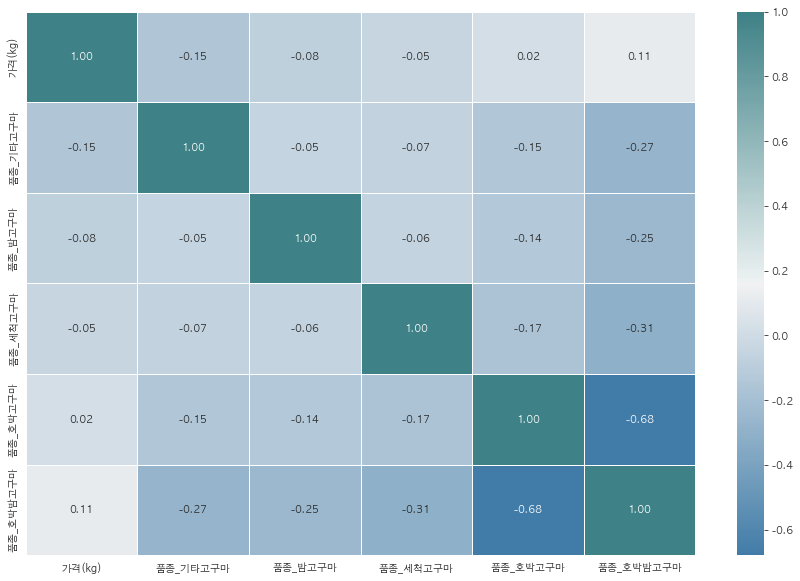

In [22]:
# 고구마 품종별 가격과의 상관관계 시각화
plt.figure(figsize=(15, 10))
species_corr = df_species.corr()
cmap = sns.diverging_palette(240, 200, n=9, as_cmap=True)
sns.heatmap(species_corr, annot=True, cmap=cmap, linewidths=0.5, fmt='.2f')
plt.show()

- 고구마의 품종과 가격의 유의미한 상관관계는 나타나지 않음

## 5.3 산지와 가격의 상관관계

In [23]:
# 고구마 산지 라벨링
df_local = pd.DataFrame({'산지': auction2['산지']})
df_local = pd.get_dummies(df_local)

# 산지별 데이터프레임에 가격 컬럼 추가
df_local['가격(kg)'] = auction2['가격(kg)']

# 타겟 데이터를 맨 앞 컬럼으로 재배치
df_local = df_local[['가격(kg)',
                     '산지_강원', '산지_경기', '산지_경남', '산지_경북', '산지_광주',
                     '산지_대구', '산지_대전', '산지_서울', '산지_수입(중국)', '산지_인천',
                     '산지_전남', '산지_전북', '산지_제주', '산지_충남', '산지_충북']]
df_local.head()

,가격(kg),산지_강원,산지_경기,산지_경남,산지_경북,산지_광주,산지_대구,산지_대전,산지_서울,산지_수입(중국),산지_인천,산지_전남,산지_전북,산지_제주,산지_충남,산지_충북
0,500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1200,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1300,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1900,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


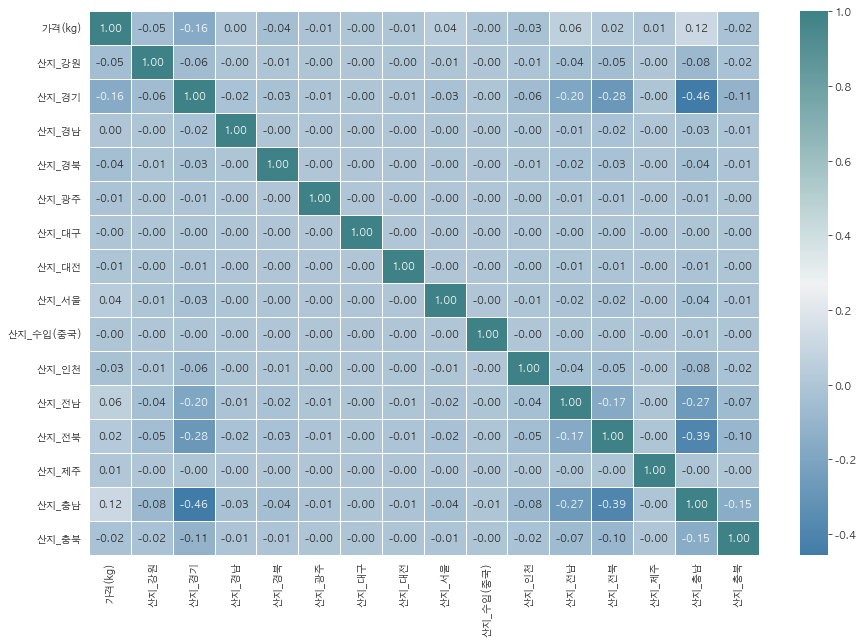

In [24]:
# 산지별 가격 상관관계
local_corr = df_local.corr()
cmap = sns.diverging_palette(240, 200, n=9, as_cmap=True)
plt.figure(figsize=(15, 10))
sns.heatmap(local_corr, annot=True, cmap=cmap, linewidths=0.5, fmt='.2f')
plt.show()

- 산지와 가격의 유의미한 상관관계 나타나지 않음

## 5.4 친환경구분과 가격의 상관관계

In [25]:
# 고구마 품종 라벨링
df_organic = pd.DataFrame({'친환경구분': auction2['친환경구분']})
df_organic = pd.get_dummies(df_organic)

# 산지별 데이터프레임에 가격 컬럼 추가
df_organic['가격(kg)'] = auction2['가격(kg)']

# 타겟 데이터를 맨 앞 컬럼으로 재배치
df_organic = df_organic[['가격(kg)',
                         '친환경구분_무농약', '친환경구분_우수농산물',
                         '친환경구분_유기농', '친환경구분_일반',
                         '친환경구분_전환기', '친환경구분_품질인증']]
df_organic.head()

,가격(kg),친환경구분_무농약,친환경구분_우수농산물,친환경구분_유기농,친환경구분_일반,친환경구분_전환기,친환경구분_품질인증
0,500,0,0,0,1,0,0
1,1200,0,0,0,1,0,0
2,1300,0,0,0,1,0,0
3,1950,0,0,0,1,0,0
4,1900,0,0,0,1,0,0


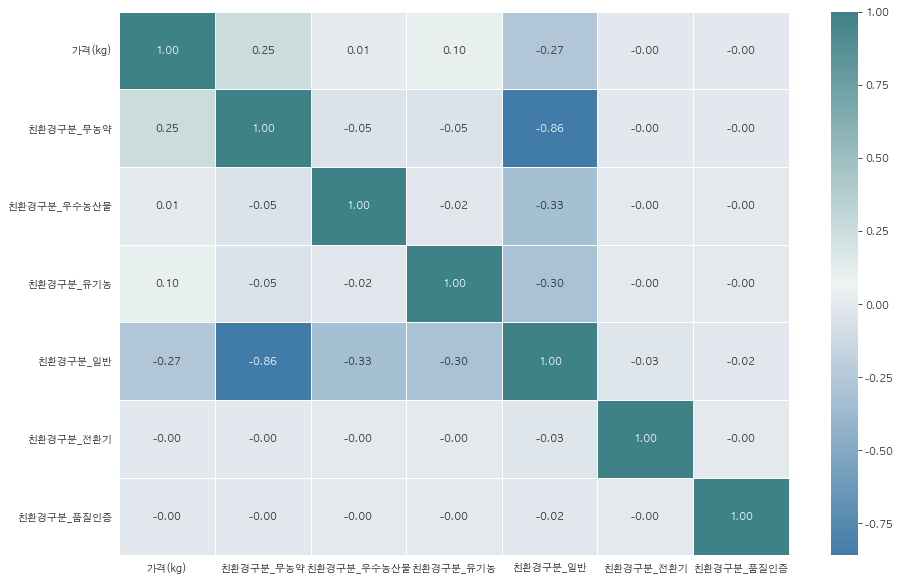

In [26]:
# 친환경구분별 가격 상관관계
plt.figure(figsize=(15, 10))
organic_corr = df_organic.corr()
cmap = sns.diverging_palette(240, 200, n=9, as_cmap=True)
sns.heatmap(organic_corr, annot=True, cmap=cmap, linewidths=0.5, fmt='.2f')
plt.show()

## 5.5 연도, 경매월, 등급(수치형 데이터)과 가격의 상관관계

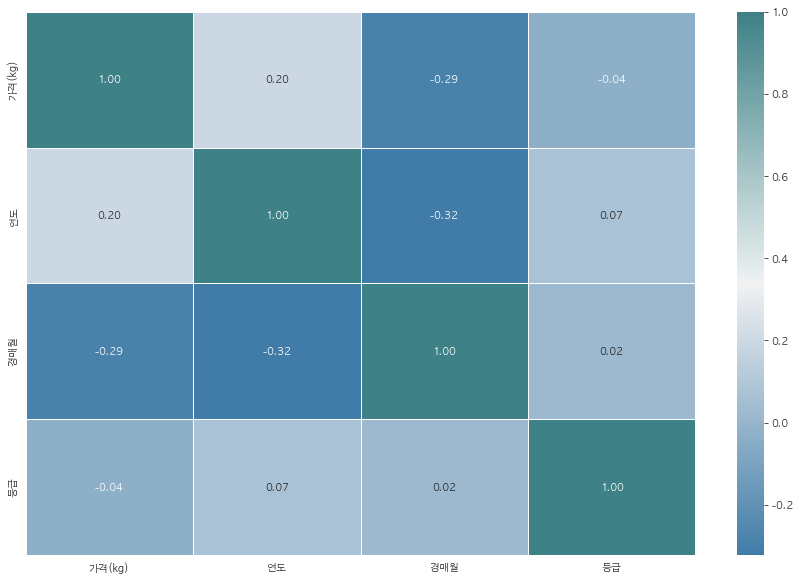

In [27]:
# 수치형 데이터와 가격 상관관계
df_auction = auction2[['가격(kg)', '연도', '경매월', '등급']]
auction2_corr= df_auction.corr()
cmap = sns.diverging_palette(240, 200, n=9, as_cmap=True)
plt.figure(figsize=(15, 10))
sns.heatmap(auction2_corr, annot=True, cmap=cmap, linewidths=0.5, fmt='.2f')
plt.show()

- 등급과 가격은 유의미한 상관관계가 나타나지 않았으며,
- 경매월과 연도는 아주 약한 상관관계가 나타났으나 가격에 큰 영향을 미치는 요소는 아니라고 판단됨

## 5.6 종합
- 피처(X) : 연도, 경매월, 품종, 등급, 가격, 산지, 친환경구분
- 타겟(Y) : 경매 가격
- 피처 데이터 중 타겟 데이터인 고구마의 경매 낙찰 가격(=도매가격)과 유의미한 상관관계를 보이는 요소는 발견되지 않음
- 해당 자료에서 유의미한 관계가 나타나지 않은 요소로는 데이터셋의 퀄리티가 영향을 미쳤을 가능성이 있음
    - 고구마의 품종 분류가 명확하지 않음
    - 등급 기준(1~9)이 실제 고구마의 등급 규격(특, 상, 보통)과 동일하지 않음
    - 입력일이 실제 경매가 진행된 날짜가 아닌, 해당 월의 경매 데이터를 입력한 날로 추정
    - 월별 데이터의 개수가 균등하지 않으며, 월 내에서 가격의 선후 관계를 파악할 수 없음
- 결론: 상관성이 적은 피처들로 타겟을 예측하는 모델을 만들기에는 부적절할 것으로 보이며, 설명력이 많이 떨어질 것으로 예상됨